# Lab 5 - Probability Plots
*Your Name Here*

## Electromyographic signals

Electromyography (EMG) records the electrical potential of muscle activity, and, as such,
is  a  useful  tool  in  developing  neurologically-activated  devices,  such  as  prosthetics.   One
complication  in  making  such  devices  practical  is  the  variability  in  EMG  signal  intensity,
even for signals triggering the same action in the same muscle.  A couple cutting-edge papers
look at this variability:

- Rupasov VI, Lebedev MA, Erlichman JS, Linderman M (2012). *Neuronal Variability during Handwriting:  Lognormal Distribution*.  PLoS ONE 7(4):  e34759. doi:10.1371/journal.pone.0034759

- Rupasov  VI,  Lebedev  MA,  Erlichman  JS,  Lee  SL,  Leiter  JC,  Linderman  M  (2012). *Time-Dependent Statistical and Correlation Properties of Neural Signals during Hand- writing*.  PLoS ONE 7(9):  e43945.  doi:10.1371/journal.pone.0043945

**Read the first paper** (available  on  Sakai,  or  searchable  online). The  second  paper,  in
particular the “Methods” section, may help clarify some procedures in the first paper, and
it also makes use of some other interesting statistics that we’ve talked about already.
Note from the author affiliations in these papers that this is Duke research! You will be using the very same data from this first paper.

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The file electro_data1.csv contains a single vector (length of 412) of dimensionless EMG energies from time interval 2, channel 1 in the first paper. This corresponds to $E(2,1,j), (j= 1,2,...,412)$ of Eq. 3.  Your assignment is to investigate two alternative methods for making probability plots.

In [222]:
electro = pd.read_csv("./electro_data1.csv")

In [223]:
electro.shape

(412, 1)

In [224]:
electro.head(5)

,EMG_Data
0,1.09790
1,0.24520
2,0.95856
3,0.82484
4,0.64312


In [290]:
np.mean(electro)

EMG_Data    0.999999
dtype: float64

Reminder: A random variable $X$ has a lognormal distribution with parameters $\mu, \theta^2$ if: 
$$
Y = ln(X) \sim N(\mu, \sigma^2)
$$

## Recreate Figure 2a from the first paper above.
This  figure  makes  a  log-normal  probability  plot  (a  probability  plot  presuming  a  log-normal distribution of the data), and then overlays a line for the normal distribution. The documentation for the Scientific Python (SciPy) function probplot (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) will help with plotting the data versus theoretical quantiles.

In [375]:
from scipy import log
import scipy.stats as stats

### Lognormal parameters from Equation 6

In [186]:
ln_var = np.log(1+np.var(electro))
ln_var

EMG_Data    1.435731
dtype: float64

In [295]:
ln_mean = -0.5*ln_var
ln_mean

EMG_Data   -0.717865
dtype: float64

### Create plot 

In [324]:
# lognorm cdf
lnprobs = stats.lognorm.cdf(x = electro, s=1, loc = ln_mean, scale = np.sqrt(ln_var))

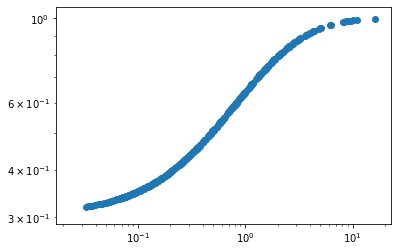

In [323]:
plt.scatter(electro, lnprobs)
plt.xscale("log")
plt.yscale("log")

In [328]:
# normal cdf
mle = stats.norm.fit(data = electro, loc = np.mean(electro), scale = np.std(electro))
mleprobs = stats.norm.cdf(x = electro, loc = mle[0], scale = mle[1])

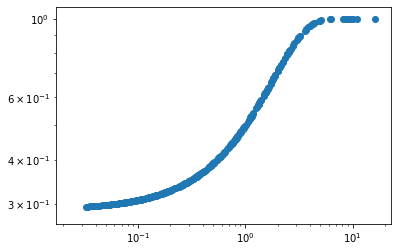

In [329]:
plt.scatter(electro, mleprobs)
plt.xscale("log")
plt.yscale("log")

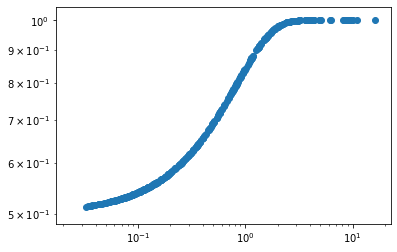

In [346]:
plt.scatter(electro, stats.norm.cdf(electro))
plt.xscale("log")
plt.yscale("log")

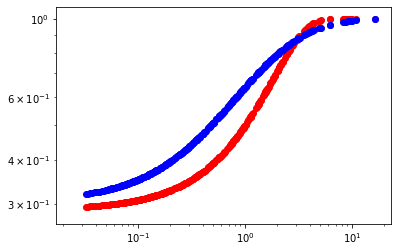

In [349]:
plt.scatter(electro, mleprobs, color = "r") # normal cdf
plt.scatter(electro, lnprobs, color = "b") # lognormal cdf
#plt.scatter(electro, stats.norm.cdf(electro, loc = np.mean(electro), scale = np.std(electro)))
#plt.scatter(x = electro, y = probs)
plt.xscale("log")
plt.yscale("log")
pass

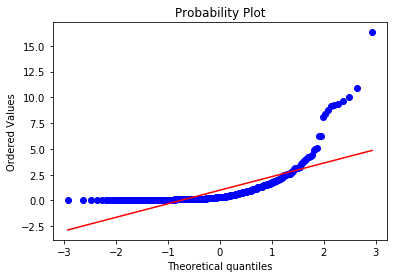

In [374]:
stats.probplot(x = electro.iloc[:,0], dist = "norm", sparams = (0,1) , plot = plt)
pass

Pay special  attention  to  Equation  6  in  the  paper,  as  this  tells  you  how  to  find  the lognormal parameters to fit the lognormal curve to your data.
Attach your version of Figure 2a to your lab report, as well as your code for creating it.

In a paragraph, discuss the following:
1. What do the points on your plot represent?
2. What do each of the lines on your plot represent?
3. Which distribution appears to describe the EMG data better, the lognormal distribution or the normal distribution? Why?

## Create a probability plot for the natural log (ln) of the data

Create the plot, then answer the following questions: 

1. Suppose we looked at the natural log of the EMG data.  What distribution should the log of the data follow?  Why?
2. Make a new probability plot that provides evidence for what you’ve answered in the previous question.  Attach this figure and its code.  Did you confirm your answer? If so, how?  If not, why not?

In [350]:
ln_electro = np.log(electro)

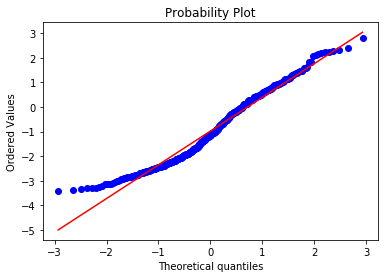

In [359]:
stats.probplot(x = ln_electro.iloc[:,0], dist = "norm", plot = plt)
pass